# Distribute Data for Crossvalidation

## Things To Do:-

<ol>
    <li>Part 1</li>
    <li>Extract Zip File, Parent Folder would contain Train and Test folder</li>
    <li>Create a new folder crossvalidation</li>
    <li>Train Folder contains 46 subfolders and 1700 Images, Extract 25% of images from the train folder to crossvalidation</li>
    <li>Part 2</li>
    <li>Create a Dataframe from all th files in the Train, Each Image is 32 * 32, we need to create a row vector 1 * 1024 for each row, </li>
    <li>Add a numbered label to decide the category in which the row falls</li>
    <li>So final row would be 1 * 1025 and rows would be 46*1275, 46 folders and 1275 files in each</li>
    <li>Final size of Dataframe would be 58650 * 1025</li>
    <li>To final test the accuracy random pick any row of dataframe and check the image is of correct label</li>
</ol>



In [1]:
import pandas as pd
import numpy as np

from zipfile import ZipFile 

import os.path
from os import path
import shutil

In [2]:
# specifying the zip file name 
zip_file_name = "../data/DevanagariHandwrittenDigitsDataset.zip"

zip_folder_name = "../data/DevanagariHandwrittenDigitsDataset"

train_folder_name = "../data/DevanagariHandwrittenDigitsDataset/Train"

crossvalidation_folder_name = "../data/DevanagariHandwrittenDigitsDataset/crossvalidation"

zip_extract_location = "../data/"

percentage_of_files_to_extract = .25

sample_crossvalidation_file = crossvalidation_folder_name + "/digit_3/12595.png"

In [3]:
# Extract Zip file if we haven't extracted it yet

# Commented for safety
#if path.exists(zip_folder_name):
#    shutil.rmtree(zip_folder_name)

if not path.exists(zip_folder_name):
    
    # opening the zip file in READ mode 
    with ZipFile(zip_file_name, 'r') as zip: 
        
        # printing all the contents of the zip file 
        #zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path=zip_extract_location) 
        print('Done!') 
else:
    print(zip_folder_name + " Exists, Already Extracted")


../data/DevanagariHandwrittenDigitsDataset Exists, Already Extracted


In [4]:
print(os.getcwd())

/Users/agaxmp04/Documents/JupyterNotebook/Jaskerat_ML_Course/Assignments


In [5]:
# define the name of the Crossvalidation directory to be created
crossvalidationpath = os.getcwd() + "/" + zip_folder_name + "/" + "crossvalidation"

try:
    os.mkdir(crossvalidationpath)
except OSError:
    # if the folder is already there, it would fail
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory <module 'posixpath' from '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/posixpath.py'> failed


In [6]:
# Move 25% of files from Train to Crossvalidation folder

if not path.exists(sample_crossvalidation_file):
    
    for dirpath, dirnames, filenames in os.walk(train_folder_name):
        if len(filenames) != 0:
            #print(dirpath)
            #print(dirnames)
            #print(filenames)
            destination = crossvalidation_folder_name + "/" + str(dirpath.split(sep='/').pop())

            if not path.exists(destination):
                os.mkdir(destination)

            files_to_be_moved = int(len(filenames) * percentage_of_files_to_extract)
            #print(destination)
            #print(files_to_be_moved)
            for i in range(files_to_be_moved):
                src = dirpath + "/" + filenames[i]
                dest = destination + "/" + filenames[i]
                # do debug here, is it working
                shutil.move(src = src, dst = destination);
else:
    print("Already moved")


Already moved


# Part 2

In [7]:
import imageio
import visvis as vv

In [8]:
im = imageio.imread(str(sample_crossvalidation_file))

In [9]:
im.shape

(32, 32)

In [10]:
df = pd.DataFrame(data=im)

In [11]:
df.to_csv(r'export_df.csv',index = None, header=True)

In [12]:
def showImg(image):

    # Create figure and make it wider than the default
    fig = vv.figure()
    #fig.position.w = 700

    # Create first axes
    #a1 = vv.subplot(121)

    # Display an image
    texture2d = vv.imshow(image)
    texture2d.interpolate = True # if False the pixels are visible when zooming in

    # Enter main loop
    app = vv.use() # let visvis chose a backend for me
    app.Run()

In [13]:
#showImg(im)

In [14]:
imr = im.reshape((1,1024))

In [15]:
print(imr.shape)

np_im = np.array(imr)
im_im2 = np.append(np_im, [[34]], axis=1)

print(im_im2)
print(im_im2.shape)

print(im_im2[:,:-1].shape)
#print(im_im2[:,:-1].reshape((32,32)))
#im_im3 = im_im2[:,:-1].reshape((32,32))

# which category added
print(im_im2[:,-1:])
print(im_im2[:,-1:][0][0])

(1, 1024)
[[ 0  0  0 ...  0  0 34]]
(1, 1025)
(1, 1024)
[[34]]
34


In [16]:
def getImageFromImgCat(np_image):
    return np_image[:,:-1].reshape((32,32))

In [17]:
def getCategoryFromImgCat(np_image):
    return np_image[:,-1:][0][0]

In [18]:
sample_crossvalidation_file.split("/").pop(-2)

'digit_3'

In [40]:
count = 0
images = []
lables = []
rows=[]
for dirpath, dirnames, filenames in os.walk(train_folder_name):
    #print(dirpath)
    #print(len(filenames))
    if len(filenames) != 0:
        for i in range(len(filenames)):
        #for i in range(2):
            name = filenames[i]
            directory_name = dirpath.split('/')[-1]
            image_path = src = dirpath + "/" + name
            image = imageio.imread(str(image_path))
            image = image.reshape((1,1024))
            np_image = np.array(image)
            #np_image = np.append(np_image, [[count]], axis=1)
            #cv_df.loc[i + count*2] = [np_image, directory_name]
            
            #cv_df = cv_df.append({'Image_Category':np_image, 'Category':directory_name}, ignore_index=True)
            #images.append(np_image)
            #lables.append(directory_name)
            rows.append([np_image, int(directory_name[-1])])
            #print(directory_name)
            #print(image_path)
        count += 1

In [41]:
cv_df = pd.DataFrame(data=rows, columns=['image', 'label'])

In [43]:
cv_df.head()

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [44]:
cv_df.shape

(12750, 2)

In [45]:
cv_df.iloc[5000]

image    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
label                                                    3
Name: 5000, dtype: object

In [46]:
cv_df.iloc[18][0].shape
np.mean(cv_df.iloc[18][0])

(1, 1024)

42.6005859375

In [47]:
cv_df.iloc[5000]['image']

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [48]:
df = pd.DataFrame(data=cv_df.iloc[5000]['image'].reshape(32,32))

df.to_csv(r'digit_3.csv',index = None, header=True)

In [50]:
cv_df['label'].iloc[18]

0

In [51]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.utils import shuffle

from collections import defaultdict
from builtins import range, input

In [52]:
np.seterr(invalid="raise")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [76]:
from sklearn.model_selection import train_test_split
def get_data(dataframe, limit=None):
    
    dataframe = shuffle(dataframe)
    image_data = np.array(dataframe['image'].values)
    image_data = np.array(list(map(lambda x: x[0], image_data)))
    X = image_data / 255.0 # data is from 0..255
    Y = cv_df['label'].values
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y


In [77]:
X, Y = get_data(cv_df)
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=1)

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [78]:
print(X.shape, Y.shape)
print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)
print(Xval.shape, Yval.shape)


(12750, 1024) (12750,)
(7650, 1024) (7650,)
(2550, 1024) (2550,)
(2550, 1024) (2550,)


In [79]:
# We need the rows to be the Features, so either Transpose the X or make rowvar= False,
# so that it could Transpose internally
def getCovarianceMat(X, D, smoothing=1e-2):
    cov_smooth = np.eye(D)*smoothing
    #if not X:
    #    return cov_smooth
    
    return np.cov(X.T) + cov_smooth

In [80]:
class Bayes():
    
    def __init__(self, unique_classes):
        
        self.labels=unique_classes
        
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = np.array([defaultdict(float) for index in range(len(self.labels))])
        self.priors = dict()
        for c in self.labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': getCovarianceMat(current_x, D, smoothing)
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.labels)
        P = np.zeros((N, K))
        for c in self.labels:
            mean = self.gaussians[c]['mean']
            cov = self.gaussians[c]['var']
            logpdf = mvn.logpdf(X, mean=mean, cov=cov)
            prior = np.log(self.priors[c])
            P[:,c] = logpdf + np.log(self.priors[c])
            argmax = np.argmax(P, axis=1)
        return argmax

In [82]:
print(list(set(Ytrain)))
print(list(set(Yval)))
print(list(set(Ytest)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [81]:

model = Bayes(set(Y))
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

t0 = datetime.now()
print("Validation accuracy:", model.score(Xval, Yval))
print("Time to compute validation accuracy:", (datetime.now() - t0), "Train size:", len(Yval))

t0 = datetime.now()
print("Test accuracy:", model.score(Xtest, Ytest))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))


Training time: 0:00:00.218362
Train accuracy: 0.9852287581699346
Time to compute train accuracy: 0:00:04.067556 Train size: 7650
Validation accuracy: 0.10470588235294118
Time to compute validation accuracy: 0:00:02.766348 Train size: 2550
Test accuracy: 0.09843137254901961
Time to compute test accuracy: 0:00:02.761847 Test size: 2550


Text(0.5, 1.0, '0')

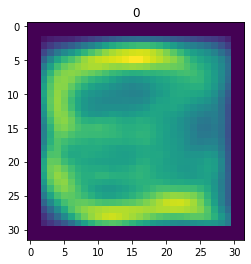

Text(0.5, 1.0, '1')

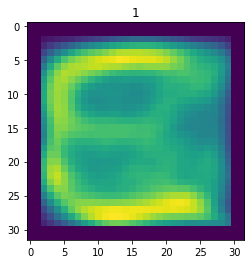

Text(0.5, 1.0, '2')

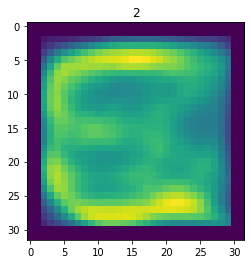

Text(0.5, 1.0, '3')

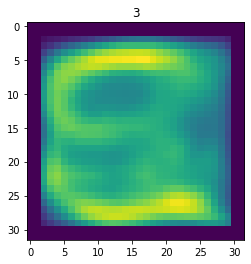

Text(0.5, 1.0, '4')

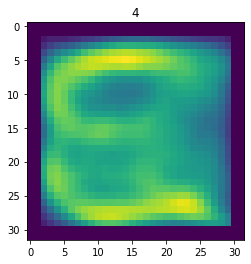

Text(0.5, 1.0, '5')

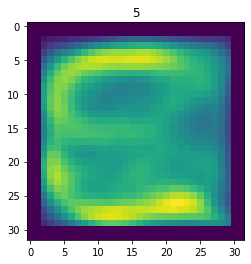

Text(0.5, 1.0, '6')

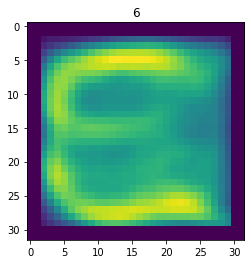

Text(0.5, 1.0, '7')

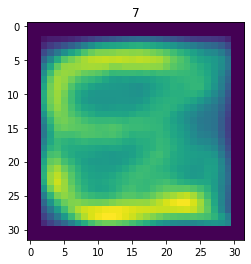

In [60]:

# plot the mean of each class
for c in model.labels:
    mean = model.gaussians[c]['mean']
    cov = model.gaussians[c]['var']
    plt.imshow(mean.reshape(32, 32))
    plt.title(c)
    plt.show()